In [1]:
%matplotlib inline

In [2]:
# This is in regards to quantifying the error for continuous
# problems like trying to predict an age instead of a gender.

In [3]:
m = 2
b = 1
y = lambda x: m*x+b

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
# Steps:
#  -> Use 'y' to generate 'y_actual'
#  -> Use 'y_actual' plus some err to generate 'y_prediction'
#  -> Plot the differences.
#  -> Walk through various metrics and plot some of them.

In [6]:
def data(x, m=2, b=1, e=None, s=10):
    """
    Args:
        x: The x value
        m: slope
        b: The y intercept
        e: Error, optional, True will give random error.
        s: Level of noise to generate for predictions.
    """
    if e is None:
        e_i = 0
    elif e is True:
        e_i = np.random.normal(0, s, len(xs))
    else:
        e_i = e
    
    return x * m + b + e_i

In [7]:
# now define 'y_hat' and 'y_actual'
from functools import partial

In [8]:
N = 100
xs = np.sort(np.random.rand(N)*100)
y_pred_gen = partial(data, x=xs, e=True)
y_true_gen = partial(data, x=xs)

y_pred = y_pred_gen()
y_true = y_true_gen()

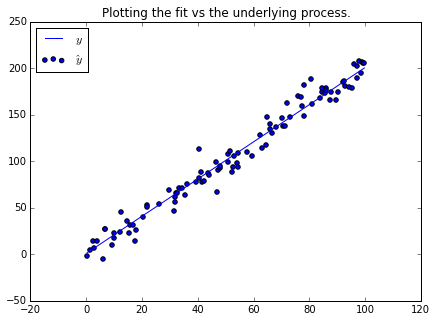

In [10]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Plotting the fit vs the underlying process.")
ax.scatter(xs, y_pred, label=r'$\hat{y}$')
ax.plot(xs, y_true, label=r'$y$')
ax.legend(loc='best')

(array([  1.,   4.,   8.,  16.,  31.,  21.,  11.,   4.,   1.,   3.]),
 array([-27.86802544, -22.01590476, -16.16378408, -10.3116634 ,
         -4.45954272,   1.39257797,   7.24469865,  13.09681933,
         18.94894001,  24.8010607 ,  30.65318138]),
 <a list of 1 Patch objects>)

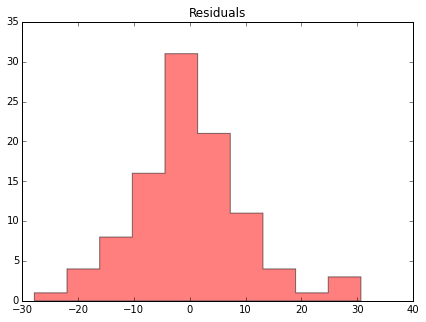

In [11]:
e_hat = y_pred - y_true
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Residuals")
ax.hist(e_hat, color='r', alpha=.5, histtype='stepfilled')

In [13]:
# How does it work?
# A metric is just the mean squared error:
# MSE = ERROR((y_true - y_pred)**2)
metrics.mean_squared_error(y_true, y_pred)

99.715701353536531

In [14]:
# The above code will penalize large errors more than small errors
# It is important to remember that all that's happening here is
# applying what (probably) was the cost function for the model
# on the test data.

In [16]:
# A different option would be the absolute deviation. Take the
# absolute value of the difference.
# MAD = ERROR(|y_true - y_pred|)

In [17]:
# The final option is the R^2, this is 1 minus the ration of the
# squared errors for the overall mean and the fit model. As the
# ratio tends to 0, the R^2 tends to 1.

metrics.r2_score(y_true, y_pred)

0.97184042052442099

In [18]:
# R2 is deceptive though, as it cannot give the clearest sense
# of the accuracy of the model.